In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Load and clean data

In [2]:
#load data
data = pd.read_csv("breast-cancer.data",names=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])

In [71]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
#prepossessing
np.unique(data['class'])

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [4]:
np.sum(data[data['class'] == 'no-recurrence-events'], 1)

0      3
1      2
2      2
3      2
4      2
      ..
196    1
197    2
198    2
199    1
200    3
Length: 201, dtype: int64

In [5]:
np.sum(data[data['class'] == 'recurrence-events'], 1)

201    2
202    1
203    2
204    2
205    2
      ..
281    2
282    3
283    1
284    3
285    3
Length: 85, dtype: int64

In [6]:
def replaceVal(x,y):
    for i in range(len(x)):
        if x.iloc[i] == y:
            x.iloc[i] = 1
        else:
            x.iloc[i] = 0
    return x

In [7]:
data['class']=replaceVal(data['class'],'no-recurrence-events')

/home/aims/.local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,1,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,1,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,1,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [9]:
classes = np.unique(data['class'])
classes

array([0, 1])

In [10]:
data['irradiat']=replaceVal(data['irradiat'],'yes')

/home/aims/.local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data.tail()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
281,0,30-39,premeno,30-34,0-2,no,2,left,left_up,0
282,0,30-39,premeno,20-24,0-2,no,3,left,left_up,1
283,0,60-69,ge40,20-24,0-2,no,1,right,left_up,0
284,0,40-49,ge40,30-34,3-5,no,3,left,left_low,0
285,0,50-59,ge40,30-34,3-5,no,3,left,left_low,0


In [12]:
data['breast']=replaceVal(data['breast'],'left')
data.head()

/home/aims/.local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,30-39,premeno,30-34,0-2,no,3,1,left_low,0
1,1,40-49,premeno,20-24,0-2,no,2,0,right_up,0
2,1,40-49,premeno,20-24,0-2,no,2,1,left_low,0
3,1,60-69,ge40,15-19,0-2,no,2,0,left_up,0
4,1,40-49,premeno,0-4,0-2,no,2,0,right_low,0


In [13]:
np.unique(data['age'])

array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object)

In [14]:
age = pd.get_dummies(data['age'])
age

,20-29,30-39,40-49,50-59,60-69,70-79
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
281,0,1,0,0,0,0
282,0,1,0,0,0,0
283,0,0,0,0,1,0
284,0,0,1,0,0,0


In [15]:
node = pd.get_dummies(data['inv-nodes'])
node

,0-2,12-14,15-17,24-26,3-5,6-8,9-11
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
281,1,0,0,0,0,0,0
282,1,0,0,0,0,0,0
283,1,0,0,0,0,0,0
284,0,0,0,0,1,0,0


In [16]:
tumor = pd.get_dummies(data['tumor-size'])
tumor

,0-4,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,5-9,50-54
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
281,0,0,0,0,0,1,0,0,0,0,0
282,0,0,0,1,0,0,0,0,0,0,0
283,0,0,0,1,0,0,0,0,0,0,0
284,0,0,0,0,0,1,0,0,0,0,0


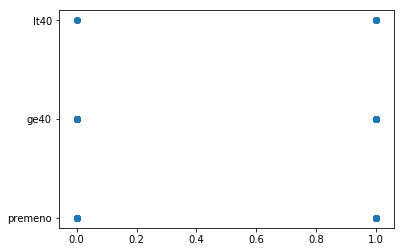

In [17]:
plt.scatter(data['class'],data['menopause'])

In [18]:
np.unique(data['menopause'])

array(['ge40', 'lt40', 'premeno'], dtype=object)

In [19]:
menopause = pd.get_dummies(data['menopause'])
menopause

,ge40,lt40,premeno
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
281,0,0,1
282,0,0,1
283,1,0,0
284,1,0,0


In [20]:
#define our features and target
x = pd.concat([age,menopause,tumor,node,data['irradiat'],data['breast']], axis=1)
target = data['class']

In [21]:
x.head()

,20-29,30-39,40-49,50-59,60-69,70-79,ge40,lt40,premeno,0-4,...,50-54,0-2,12-14,15-17,24-26,3-5,6-8,9-11,irradiat,breast
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [22]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [23]:
x = np.array(x)
y = np.array(target)
x.shape

(286, 29)

In [24]:
#split data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True, random_state=19)

# Logistique regression

In [25]:
#create our model
lg = LogisticRegression().fit(x_train,y_train)

/home/aims/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
lg.coef_

array([[ 0.28342604, -0.1705097 ,  0.20076258,  0.03391898, -0.07559248,
         0.04747323,  0.41522828, -0.01838693, -0.07736271,  0.09728297,
         1.07588149,  0.28042543, -0.19442688, -0.23033469, -0.71358436,
        -0.66203138,  0.0871735 ,  0.32347648,  0.43416798, -0.17855189,
         1.0637122 , -0.24000896,  0.21378786, -0.36718945,  0.15275839,
        -0.0258823 , -0.4776991 , -0.4227739 , -0.21902246]])

In [27]:
predict = lg.predict(x_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1])

In [28]:
acc = lg.score(x_test,y_test)
acc

0.75

In [29]:
lg.intercept_

array([0.31947864])

# GDA

In [30]:
gda = LinearDiscriminantAnalysis()

In [31]:
g = gda.fit(x_train,y_train)

/home/aims/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [32]:
g.coef_

array([[ 2.45411334, -0.21793695,  0.25384472, -0.01915254, -0.20513199,
        -0.07006767,  0.3114161 , -0.19684409, -0.29552637,  0.34438358,
         1.19357489,  0.51651174, -0.03414796, -0.12268808, -0.73452577,
        -1.01456463,  0.257498  ,  2.84009929,  1.31238552, -0.14368443,
         0.83829856, -2.4227932 ,  0.1936536 , -3.27113677, -0.29239962,
        -0.7411403 , -1.4387071 , -0.41611119, -0.22292218]])

In [33]:
g.intercept_

array([0.83805573])

In [34]:
g.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1])

In [35]:
g.score(x_test,y_test)

0.7083333333333334

# NN

In [36]:
class MPL(nn.Module):
    def __init__(self):
        super(MPL, self).__init__()
        
        self.l1 = nn.Linear(29, 10)
        self.out = nn.Linear(10,2)
        
    def forward(self,x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.out(x)
        x = F.sigmoid(x, dim=1)
        return x

In [37]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x = torch.tensor(x)
mlp = MPL()
optimizers = optim.Adam(mlp.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [38]:
output = data['class']
def train(mlp, x_train,y_train, epoch=20):
    error = []
    acc = []
    for e in range(epoch):
        optimizers.zero_grad()
        loss = criterion(output,y_train)
        loss.backward()
        optimizer.step()
        error = [loss.item()]
        print(error)
       

In [ ]:
train(mlp,x_train,y_train)